In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
path = 'chipotle.tsv'
chipo = pd.read_csv('/Users/elzaniyazbekova/Desktop/ML/chipotle (1).tsv', sep='\t')

In [7]:
chipo.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [7]:
chipo.shape

(4622, 5)

In [8]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [8]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [9]:
chipo['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [10]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [9]:
cat_col = chipo.select_dtypes(include='object').columns
num_col = chipo.select_dtypes(exclude='object').columns
print(cat_col)
print(num_col)

Index(['item_name', 'choice_description', 'item_price'], dtype='object')
Index(['order_id', 'quantity'], dtype='object')


In [10]:
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [12]:
print(chipo.select_dtypes(include='int64').columns)

Index(['order_id', 'quantity'], dtype='object')


In [13]:
chipo['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

# Convert

In [14]:
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

In [15]:
chipo['item_price'].dtype

dtype('float64')

In [17]:
chipo.describe()

,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


In [18]:
chipo[chipo.quantity > 1.00]['order_id'].count()


np.int64(267)

In [19]:
prices = chipo[['item_name', 'item_price']]
prices

,item_name,item_price
0,Chips and Fresh Tomato Salsa,2.39
1,Izze,3.39
2,Nantucket Nectar,3.39
3,Chips and Tomatillo-Green Chili Salsa,2.39
4,Chicken Bowl,16.98
...,...,...
4617,Steak Burrito,11.75
4618,Steak Burrito,11.75
4619,Chicken Salad Bowl,11.25
4620,Chicken Salad Bowl,8.75


# 13. Sort the dataset by the item name


In [21]:
chipo.item_name.sort_values()

3389    6 Pack Soft Drink
341     6 Pack Soft Drink
1849    6 Pack Soft Drink
1860    6 Pack Soft Drink
2713    6 Pack Soft Drink
              ...        
2384    Veggie Soft Tacos
781     Veggie Soft Tacos
2851    Veggie Soft Tacos
1699    Veggie Soft Tacos
1395    Veggie Soft Tacos
Name: item_name, Length: 4622, dtype: object

In [23]:
chipo.sort_values(by = "order_id")


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25


# 14. What is the quantity of the most expensive item ordered?


In [24]:
chipo.sort_values(by = "item_price", ascending = False)['quantity'].head(1)


3598    15
Name: quantity, dtype: int64

In [25]:
chipo[chipo['item_price'] == max(chipo['item_price'])]['quantity']


3598    15
Name: quantity, dtype: int64

In [26]:
chipo.sort_values(by="item_price", ascending=False)['quantity'].head(1).item()


15

In [27]:
chipo.sort_values(by="order_id", ascending=False)['quantity'].head(1).values[0]


np.int64(1)

# 15. How many times was a Veggie Salad Bowl ordered?


In [28]:
print(chipo[chipo.item_name == "Veggie Salad Bowl"]['quantity'].sum())


18


In [29]:
print(chipo[chipo.item_name == "Steak Burrito"]['quantity'].sum())


386


# 16. How many times did someone order more than one Canned Soda?


In [31]:
condition = (chipo.item_name == "Canned Soda") & (chipo.quantity > 1)
chipo[condition]['quantity'].count()



np.int64(20)

# 17. How many different products are sold?


In [32]:
print(chipo['item_name'].nunique())


50


In [33]:
print(chipo['item_name'].unique())


['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos' 'Chicken Soft Tacos' 'Chicken Burrito'
 'Canned Soda' 'Barbacoa Burrito' 'Carnitas Burrito' 'Carnitas Bowl'
 'Bottled Water' 'Chips and Tomatillo Green Chili Salsa' 'Barbacoa Bowl'
 'Chips' 'Chicken Salad Bowl' 'Steak Bowl' 'Barbacoa Soft Tacos'
 'Veggie Burrito' 'Veggie Bowl' 'Steak Crispy Tacos'
 'Chips and Tomatillo Red Chili Salsa' 'Barbacoa Crispy Tacos'
 'Veggie Salad Bowl' 'Chips and Roasted Chili-Corn Salsa'
 'Chips and Roasted Chili Corn Salsa' 'Carnitas Soft Tacos'
 'Chicken Salad' 'Canned Soft Drink' 'Steak Salad Bowl'
 '6 Pack Soft Drink' 'Chips and Tomatillo-Red Chili Salsa' 'Bowl'
 'Burrito' 'Crispy Tacos' 'Carnitas Crispy Tacos' 'Steak Salad'
 'Chips and Mild Fresh Tomato Salsa' 'Veggie Soft Tacos'
 'Carnitas Salad Bowl' 'Barbacoa Salad Bowl' 'Salad' 'Veggie Cris

# 18. What is the total revenue?


In [34]:
print(round((chipo['item_price'] * chipo['quantity']).sum()))


39237


# 19. What is the average price of items?


In [36]:
print(round(chipo['item_price'].mean(), 3))


7.464


# 20. How many orders were made in total?


In [37]:
print(chipo['order_id'].nunique())


1834


# 21. What is the total quantity of items ordered?


In [38]:

total_quantity = chipo['quantity'].sum()
print(total_quantity)

4972


In [39]:
otal_quantity = chipo['order_id'].sum()
print(total_quantity)

4972


# 22. Which item has the highest average price?


In [40]:
chipo.groupby('item_name')['item_price'].mean().idxmax()


'Bowl'

# 23. How many items include “Chicken” in their name?


In [41]:
chipo[chipo['item_name'].str.contains('Chicken')]['item_name'].count()


np.int64(1560)

In [42]:
chipo[chipo['item_name'].str.contains('Salsa')]['item_name'].count()


np.int64(293)

# 24. Which item was the most-ordered item?



In [43]:
chipo.groupby('item_name')['quantity'].sum().idxmax()


'Chicken Bowl'

# 25. Group the dataset by item_name and count how many times each product appears.


In [44]:
chipo.groupby('item_name').size().sort_values(ascending=False)

item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48


# 26. calculate the total quantity sold for each product.


In [47]:
chipo.groupby('item_name')['quantity'].sum()

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


# 27. What is the average quantity of items per order?


In [48]:
chipo.groupby('order_id')['quantity'].mean()


order_id
1       1.0
2       2.0
3       1.0
4       1.0
5       1.0
       ... 
1830    1.0
1831    1.0
1832    1.0
1833    1.0
1834    1.0
Name: quantity, Length: 1834, dtype: float64

# 28. Plot the top 5 most ordered items.


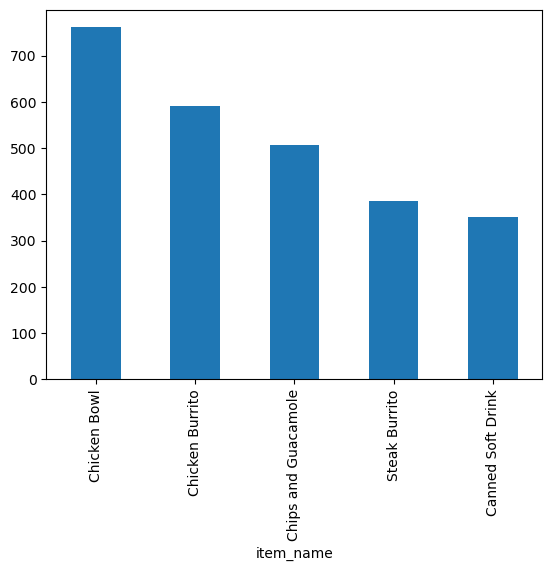

In [51]:
top5 = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(5)
top5.plot(kind='bar');


# 3
0
.
C
alc
ula
t
e
t
h
e
t
o
t
al r
e
v
e
n
u
e
g
e
n
e
r
a
t
e
d
b
y
e
a
c
h
i
t
e
m
a
n
d
plo
t
t
h
e
t
o
p
1
0
h
i
g
h
e
s
t
-
r
e
v
e
n
u
e
i
t
e
m
s
.

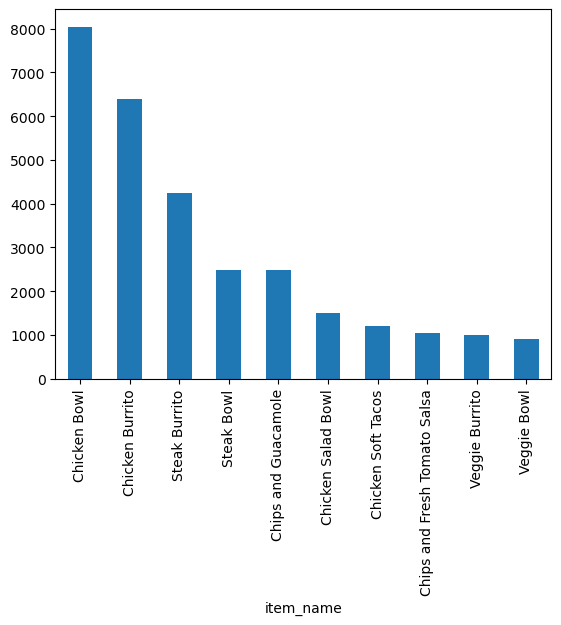

In [53]:
chipo['revenue'] = chipo['item_price']*chipo['quantity']
chipo.groupby('item_name')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar');


# 31. What was the most ordered item in the choice_description column?


In [61]:
chipo['choice_description'].value_counts().idxmax()


'[Diet Coke]'

# 32. What is the average revenue amount per order?


In [62]:
chipo.groupby('order_id')['item_price'].sum().mean()

np.float64(18.811428571428568)

# 33. Which product has the highest total quantity sold?


In [63]:
chipo.groupby('item_name')['quantity'].sum().idxmax()


'Chicken Bowl'

# 34. calculate the average price of each product.


In [64]:
chipo.groupby('order_id')['item_price'].mean()


order_id
1        2.890000
2       16.980000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: item_price, Length: 1834, dtype: float64

# 35. Which choice appears most often?


In [65]:
chipo['choice_description'].value_counts().idxmax()


'[Diet Coke]'